In [1]:
import numpy as np
from matplotlib import pyplot as plt
import jax
import jax.numpy as jnp
# from jax.config import config
jax.config.update("jax_enable_x64", True)

In [43]:
L = 5.0

dt = 1e-2

tvec = np.arange(0, 5, dt)

theta = 0.5

x0 = 2.0

In [44]:
def rk2prop(thisx, thistheta):
    return (1 + dt * thistheta + 0.5 * (dt * thistheta)**2) * thisx

In [45]:
jitrk2prop = jax.jit(rk2prop)
print(jitrk2prop(x0, theta))

2.0100249999999997


Linf error: 0.00025285079205872307
L2 error: 0.0020919083281495847


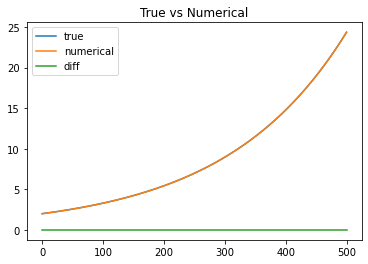

In [47]:
xvectrue = [x0]
xvecnum = [x0]

for _ in tvec:
    xvectrue.append(xvectrue[-1] * np.exp(theta * dt))
    xvecnum.append(jitrk2prop(xvecnum[-1], theta))

xvectrue = np.array(xvectrue)
xvecnum = np.array(xvecnum)

# print(np.abs(xvectrue - xvecnum))
print('Linf error:', np.max(np.abs(xvectrue - xvecnum)))
print('L2 error:', np.linalg.norm(xvectrue - xvecnum))

# plt.plot(np.abs(xvectrue - xvecnum))
# plt.title('Abs Diff of True vs Numerical')
# plt.show()

plt.plot(xvectrue, label='true')
plt.plot(xvecnum, label='numerical')
plt.plot(np.abs(xvectrue - xvecnum), label='diff')
plt.title('True vs Numerical')
plt.legend()
plt.show()

In [36]:
def objective(thetahat):
    xhatvec = [x0]

    for _ in tvec:
        xhatvec.append(jitrk2prop(xhatvec[-1], thetahat))

    xhatvec = jnp.array(xhatvec)

    return 0.5 * jnp.sum((xvecnum - xhatvec)**2)

In [37]:
gradobjective = jax.grad(objective)
print(gradobjective(theta))

-0.0


In [38]:
def analygradobj(thetahat):
    xhatvec = [x0]

    for _ in tvec:
        xhatvec.append(jitrk2prop(xhatvec[-1], thetahat))

    xhatvec = jnp.array(xhatvec)

    # print(xhatvec.shape)
    # print(xhatvec[:-1].shape)

    return -1 * dt * (1 + dt * thetahat) * jnp.sum((xvecnum[1:] - xhatvec[1:]) * xhatvec[:-1])

In [39]:
print(analygradobj(theta))

-0.0


In [42]:
seed = None
for _ in range(10):
    thisthetahat = np.random.default_rng(seed).uniform(-10, 10)
    thisjaxgrad = gradobjective(thisthetahat)
    thisgrad = analygradobj(thisthetahat)
    print(thisjaxgrad, thisgrad, np.abs(thisjaxgrad - thisgrad), sep='\t')

-10.066980533949287		-0.3858197809600201		9.681160752989268
4233255337.7548723		9027954.102631811		4224227383.6522403
-5.887396646898451		-0.2914431851892272		5.5959534617092235
7.751726950936315e+19		1.5882205772951194e+17		7.735844745163365e+19
5.963242209430235e+22		1.217318478535474e+20		5.95106902464488e+22
-28342.45525493197		-75.39105928277444		28267.064195649196
-50.33947335317254		-0.9084464038824279		49.43102694929011
-11.216915850196578		-0.40836952390531195		10.808546326291266
287628483.08804786		622200.6223595071		287006282.46568835
-10.960737895284048		-0.40344170385186245		10.557296191432185
